In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
sentences = [
    'I love my dog',
    'I love my cat',
    'you love my dog!',
    'Do you think my dog is amazing?'
]

In [4]:
tokenizer = Tokenizer(num_words=100, oov_token="<00V>")
tokenizer.fit_on_texts(sentences)

In [5]:
word_index = tokenizer.word_index

In [6]:
word_index

{'<00V>': 1,
 'my': 2,
 'love': 3,
 'dog': 4,
 'i': 5,
 'you': 6,
 'cat': 7,
 'do': 8,
 'think': 9,
 'is': 10,
 'amazing': 11}

In [7]:
sequences = tokenizer.texts_to_sequences(sentences)

In [8]:
print(word_index)
print(sequences)

{'<00V>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]


In [9]:
test_data = [
    'I really love my dog',
    'my dog loves my manatee'
]

In [10]:
test_sequences = tokenizer.texts_to_sequences(test_data)

In [11]:
print(test_sequences)

[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [12]:
# add 0 after(padding = 'post') or before(padding = 'pre') sentences to the max len sentences,  maxlen deines seqence len,
#truncating defines to cut out of maxlen sequences from post or pre.
padded = pad_sequences(sequences, padding='post',maxlen=6,truncating='post')

In [13]:
print(word_index)
print(sequences)
print(padded)

{'<00V>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[ 5  3  2  4  0  0]
 [ 5  3  2  7  0  0]
 [ 6  3  2  4  0  0]
 [ 8  6  9  2  4 10]]


In [14]:
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('sarcasm.json'))

In [15]:
sentences1 = []
labels = []
urls = []

for item in data:
    sentences1.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [16]:
len(sentences1)

26709

In [17]:
tokenizer1 = Tokenizer(oov_token="<00V>")
tokenizer1.fit_on_texts(sentences1)

In [18]:
word_ind = tokenizer1.word_index

In [19]:
sequences1 = tokenizer1.texts_to_sequences(sentences1)
padded1 = pad_sequences(sequences1, padding='post')

In [20]:
print(padded1[0])
print(padded1.shape)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [21]:
print(word_ind)

{'<00V>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down': 82, 'if': 83, '5': 84, 'when': 85, 'world': 86, 'could': 87, 'we': 88, 'th

In [22]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [23]:
training_sentences = sentences1[0:training_size]
testing_sentences = sentences1[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [24]:
tokenizer_t = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer_t.fit_on_texts(training_sentences)

word_index_t = tokenizer_t.word_index

training_sequences = tokenizer_t.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_sequences = tokenizer_t.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [25]:
print(training_padded)

[[ 328    1  799 ...    0    0    0]
 [   4 6840 3096 ...    0    0    0]
 [ 153  890    2 ...    0    0    0]
 ...
 [  79 1729    1 ...    0    0    0]
 [  53 5108 4735 ...    0    0    0]
 [ 312  705    1 ...    0    0    0]]


In [26]:
testing_padded

array([[   1, 1100, 6663, ...,    0,    0,    0],
       [ 202,    1,    8, ...,    0,    0,    0],
       [  18,  380,  191, ...,    0,    0,    0],
       ...,
       [   1,    9,   67, ...,    0,    0,    0],
       [1556,  374, 4114, ...,    0,    0,    0],
       [   1, 1700,    6, ...,    0,    0,    0]])

In [27]:
print(word_index_t)

{'<OOV>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'by': 19, 'this': 20, 'after': 21, 'be': 22, 'up': 23, 'out': 24, 'that': 25, 'how': 26, 'as': 27, 'it': 28, 'not': 29, 'are': 30, 'your': 31, 'what': 32, 'his': 33, 'all': 34, 'he': 35, 'will': 36, 'who': 37, 'just': 38, 'has': 39, 'more': 40, 'one': 41, 'year': 42, 'into': 43, 'report': 44, 'have': 45, 'why': 46, 'over': 47, 'area': 48, 'u': 49, 'donald': 50, 'says': 51, 'day': 52, 'can': 53, 's': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'get': 59, 'old': 60, 'no': 61, 'her': 62, "trump's": 63, 'off': 64, 'now': 65, 'an': 66, 'obama': 67, 'life': 68, 'people': 69, 'women': 70, 'house': 71, "'": 72, 'was': 73, 'still': 74, 'white': 75, 'back': 76, 'make': 77, 'than': 78, 'clinton': 79, 'down': 80, 'when': 81, 'my': 82, '5': 83, 'could': 84, 'world': 85, 'americans': 86, 'if': 87, 'i': 

In [28]:
testing_sequences[0]

[1, 1100, 6663, 9423, 30, 1, 2439, 5, 519, 109]

In [29]:
testing_sentences[0]

'pediatricians announce 2011 newborns are ugliest babies in 30 years'

In [30]:
import numpy as np
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [34]:
num_epochs = 30
history =model.fit(training_padded,training_labels,epochs=num_epochs,verbose=2,validation_data=(testing_padded,testing_labels))

Epoch 1/30
625/625 - 3s - loss: 0.6677 - accuracy: 0.5798 - val_loss: 0.5912 - val_accuracy: 0.6634 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4371 - accuracy: 0.8220 - val_loss: 0.3841 - val_accuracy: 0.8392 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3099 - accuracy: 0.8761 - val_loss: 0.3536 - val_accuracy: 0.8523 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2585 - accuracy: 0.8985 - val_loss: 0.3453 - val_accuracy: 0.8569 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2247 - accuracy: 0.9124 - val_loss: 0.3539 - val_accuracy: 0.8492 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1966 - accuracy: 0.9247 - val_loss: 0.3535 - val_accuracy: 0.8542 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1742 - accuracy: 0.9338 - val_loss: 0.3673 - val_accuracy: 0.8557 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1569 - accuracy: 0.9421 - val_loss: 0.3875 - val_accuracy: 0.8493 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

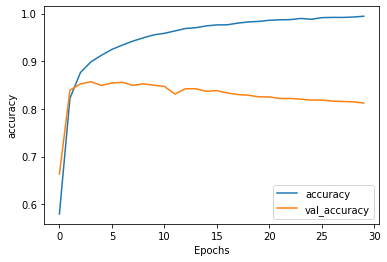

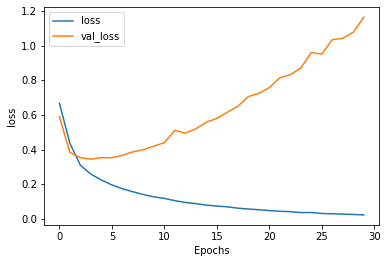

In [35]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [36]:
reverse_word_index = dict([(value, key) for (key, value) in word_index_t.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '.') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
mom starting to fear son's web series closest thing she will have to grandchild
1


In [37]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [38]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [39]:
from IPython.display import FileLink

print("Download the vecs.tsv file:")
display(FileLink('vecs.tsv'))

print("Download the meta.tsv file:")
display(FileLink('meta.tsv'))

Download the vecs.tsv file:


C:\Users\asifa\Desktop\pytorch\vecs.tsv

Download the meta.tsv file:


C:\Users\asifa\Desktop\pytorch\meta.tsv

In [40]:
test_sentence = ["granny starting to fear spiders in the garden might be real", 
                 "game of thrones season finale showing this sunday night"
                ]
test_sequences = tokenizer_t.texts_to_sequences(test_sentence)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(test_padded))

1/1 [==============================] - 0s 132ms/step
[[6.9310266e-01]
 [3.1678593e-07]]
